<a href="https://colab.research.google.com/github/YifanXu1999/AI-Learning/blob/master/Copy_of_AutoEnocderMNIST_10000TrainWith9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torch.utils.data.dataloader import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import numpy as np
!pip install tsne
from tsne import bh_sne

  Created wheel for tsne: filename=tsne-0.1.8-cp36-cp36m-linux_x86_64.whl size=226389 sha256=dd298f3a3bd7766ff194d4c229f3215030ba37a0522dbceeec07823e1c8e2fd0
  Stored in directory: /root/.cache/pip/wheels/69/b4/26/9a673d2333de6af3865b5a2b462b3b0cfe4556ae69979434dd
Successfully built tsne


In [7]:
trainData = DataLoader(MNIST(root='./root', train=True, download=True, transform=transforms.ToTensor()), shuffle=True, batch_size=128)
testData = DataLoader(MNIST(root='./root', train=False, download=True, transform=transforms.ToTensor()), shuffle=True, batch_size=5000)

Extracting ./root/MNIST/raw/train-images-idx3-ubyte.gz to ./root/MNIST/raw


Extracting ./root/MNIST/raw/train-labels-idx1-ubyte.gz to ./root/MNIST/raw



Extracting ./root/MNIST/raw/t10k-images-idx3-ubyte.gz to ./root/MNIST/raw


Extracting ./root/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./root/MNIST/raw
Processing...
Done!


In [0]:
class AutoEnocder(nn.Module):
  def __init__(self, hidden_dim=500, latent_dim=10000, norm_factor=1):
    super(AutoEnocder, self).__init__()
    self.encode_z = nn.Sequential(
        nn.Linear(784, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, latent_dim)
    )
    self.decode_output = nn.Sequential(
        nn.Linear(latent_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, 784),
        nn.Sigmoid()
    )
    self.norm_factor = norm_factor
  
  def encode(self, x_in):
    return (self.encode_z(x_in.view(-1, 784)) * self.norm_factor)
  
  def decode(self, z):
    return self.decode_output(z).view(-1, 1, 28, 28)
  
  def forward(self, x_in):
    z = self.encode(x_in)
    return self.decode(z)


In [0]:
def remove_imgs(imgs, labels, digits_to_remove):
  list_imgs = list(imgs)
  new_imgs_list = torch.tensor([])
  new_labels = []
  for i in range(len(list_imgs)):
    if labels[i] not in digits_to_remove:
      new_imgs_list = torch.cat([new_imgs_list, list_imgs[i]], 0)
      new_labels.append(labels[i])
  return  new_imgs_list.view(-1, 1, 28 ,28), new_labels

In [0]:
def train(model, optimizer, dataset, epochs=4):
  losses = []
  for epoch in range(epochs):
    for images, labels in dataset:
      x_in, _ = remove_imgs(images, labels, [0, 1, 2, 3, 4, 5, 6, 7, 8])
      print(x_in.size())
      x_out = model(x_in)
      optimizer.zero_grad()
      loss = 0.5 * (x_out - x_in).pow(2).sum() / x_in.size(0)
      losses.append(loss)
      loss.backward()
      optimizer.step()
  return losses
model = AutoEnocder(norm_factor=1)
optimizer = torch.optim.Adam(model.parameters())

torch.Size([18, 1, 28, 28])
torch.Size([10, 1, 28, 28])
torch.Size([13, 1, 28, 28])
torch.Size([14, 1, 28, 28])
torch.Size([8, 1, 28, 28])
torch.Size([13, 1, 28, 28])
torch.Size([12, 1, 28, 28])
torch.Size([14, 1, 28, 28])
torch.Size([14, 1, 28, 28])
torch.Size([14, 1, 28, 28])
torch.Size([9, 1, 28, 28])
torch.Size([9, 1, 28, 28])
torch.Size([11, 1, 28, 28])
torch.Size([9, 1, 28, 28])
torch.Size([15, 1, 28, 28])
torch.Size([15, 1, 28, 28])
torch.Size([17, 1, 28, 28])
torch.Size([16, 1, 28, 28])
torch.Size([17, 1, 28, 28])
torch.Size([10, 1, 28, 28])
torch.Size([11, 1, 28, 28])
torch.Size([15, 1, 28, 28])
torch.Size([13, 1, 28, 28])
torch.Size([12, 1, 28, 28])
torch.Size([9, 1, 28, 28])
torch.Size([13, 1, 28, 28])
torch.Size([13, 1, 28, 28])
torch.Size([11, 1, 28, 28])
torch.Size([10, 1, 28, 28])
torch.Size([8, 1, 28, 28])
torch.Size([10, 1, 28, 28])
torch.Size([13, 1, 28, 28])
torch.Size([14, 1, 28, 28])
torch.Size([10, 1, 28, 28])
torch.Size([9, 1, 28, 28])
torch.Size([15, 1, 28, 28])

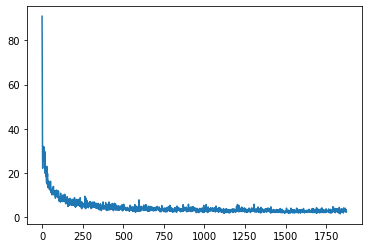

In [8]:
losses = train(model, optimizer, trainData)
plt.plot(losses)
plt.show()

In [0]:
def imshow(img):
    npimg = img.numpy()
    
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.axis('off')
    plt.show()

imgs, label = iter(testData).next()

def add_noise(x, noise_factor=0.2):
    x = x + np.random.randn(*x.shape) * noise_factor
    x = x.clip(0., 1.)
    return x
def visualize(images, label, model):
  x_in = images
  x_out = model(x_in.view(-1, 28 * 28)).data
  z = model.encode(x_in)
  imshow(make_grid(x_in[0:16]))
  imshow(make_grid(x_out[0:16]))
  return z.data.numpy()

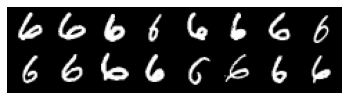

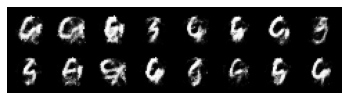

In [24]:
imgs, labels = iter(testData).next()
imgs, labels = remove_imgs(imgs, labels, [0, 1, 2, 3, 4, 5, 7, 8, 9])
z = visualize(imgs, label, model)

In [0]:
z = bh_sne(np.float64(z))

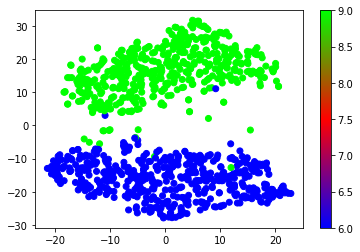

In [22]:
plt.scatter(z[:, 0], z[:, 1], c=labels, cmap='brg')
plt.colorbar()